# Data Set de prueba

In [73]:
import matplotlib.pyplot as plt

Datos=[
    [0.5,3.0,0],
    [1.1,1.5,0],
    [2.0,0.5,0],
    [2.5,4.5,0],
    [4.0,3.5,1],
    [4.1,8.0,0],
    [4.1,4.0,1],
    [5.0,1.5,1],
    [5.1,5.0,1],
    [5.5,3.1,1],
    [6.0,2.0,1],
    [6.5,5.0,1],
    [7.0,2.5,1],
    [7.0,9.0,0],
    [8.0,3.8,1],
    [8.2,5.1,0],
    [9.0,3.5,0],
    [9.5,1.8,0],
    [10.0,2.8,0],
    [7.5,1.0,1]
]

# Graficando DataSet

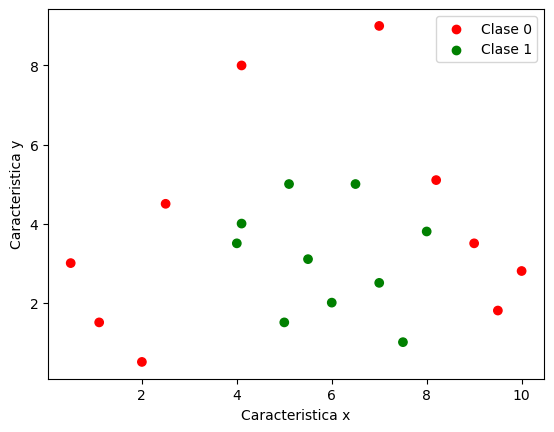

In [74]:
x = []
y = []
color = []

for elementos in Datos:
    x.append(elementos[0])
    y.append(elementos[1])
    if elementos[2] == 0:
        color.append('red')
    else:
        color.append('green')
        
        
plt.xlabel("Caracteristica x")
plt.ylabel("Caracteristica y")
plt.scatter(x,y,c=color)
plt.scatter([], [], c='red', label='Clase 0')
plt.scatter([], [], c='green', label='Clase 1')
plt.legend()
plt.show()

# Implementación algoritmo CART

In [44]:
import numpy as np

class Nodo:
    def __init__(self, caracteristica=None, umbral=None, izquierdo=None, derecho=None, valor=None):
        self.caracteristica = caracteristica  # índice de la característica a dividir
        self.umbral = umbral  # valor de umbral para dividir la característica
        self.izquierdo = izquierdo  # subárbol izquierdo
        self.derecho = derecho  # subárbol derecho
        self.valor = valor # valor para devolver si este es un nodo hoja

class CART:
    def __init__(self, profundidad_max=5, division_min_muestras=2, min_decrecimiento_impureza=0.0):
        self.profundidad_max = profundidad_max
        self.division_min_muestras = division_min_muestras
        self.min_decrecimiento_impureza = min_decrecimiento_impureza

    def gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / len(y)
        return 1 - np.sum(p ** 2)

    def division(self, X, y):
        mejor_caracteristica, mejor_umbral, mejor_gini = None, None, 1
        for caracteristica in range(X.shape[1]):
            umbrales = np.unique(X[:, caracteristica])
            for umbral in umbrales:
                y_left = y[X[:, caracteristica] < umbral]
                y_right = y[X[:, caracteristica] >= umbral]
                if len(y_left) < self.division_min_muestras or len(y_right) < self.division_min_muestras:
                    continue
                gini = (len(y_left) / len(y)) * self.gini(y_left) + (len(y_right) / len(y)) * self.gini(y_right)
                if gini < mejor_gini:
                    mejor_caracteristica, mejor_umbral, mejor_gini = caracteristica, umbral, gini
        return mejor_caracteristica, mejor_umbral, mejor_gini

    def construir_arbol(self, X, y, profundidad=0):
        if profundidad >= self.profundidad_max or len(y) < self.division_min_muestras or self.gini(y) < self.min_decrecimiento_impureza:
            return Nodo(valor=np.mean(y))
        caracteristica, umbral, gini = self.division(X, y)
        if caracteristica is None:
            return Nodo(valor=np.mean(y))
        X_left, y_left = X[X[:, caracteristica] < umbral], y[X[:, caracteristica] < umbral]
        X_right, y_right = X[X[:, caracteristica] >= umbral], y[X[:, caracteristica] >= umbral]
        izquierdo = self.construir_arbol(X_left, y_left, profundidad + 1)
        derecho = self.construir_arbol(X_right, y_right, profundidad + 1)
        return Nodo(caracteristica=caracteristica, umbral=umbral, izquierdo=izquierdo, derecho=derecho)

    def fit(self, X, y):
        self.raiz = self.construir_arbol(X, y)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x, nodo=None):
        if nodo is None:
            nodo = self.raiz
        if nodo.valor is not None:
            return nodo.valor
        if x[nodo.caracteristica] < nodo.umbral:
            return self._predict(x, nodo.izquierdo)
        else:
            return self._predict(x, nodo.derecho)


## Pequeña prueba de validación

In [75]:
import matplotlib.pyplot as plt

Datos=[
    [0.5,3.0,0],
    [1.1,1.5,0],
    [2.0,0.5,0],
    [2.5,4.5,0],
    [4.0,3.5,1],
    [4.1,8.0,0],
    [4.1,4.0,1],
    [5.0,1.5,1],
    [5.1,5.0,1],
    [5.5,3.1,1],
    [6.0,2.0,1],
    [6.5,5.0,1],
    [7.0,2.5,1],
    [7.0,9.0,0],
    #[8.0,3.8,1],Dato usado para probar precision
    [8.2,5.1,0],
    [9.0,3.5,0],
    [9.5,1.8,0],
    #[10.0,2.8,0],Dato usado para probar precision
    [7.5,1.0,1]
]

In [46]:

# separar características y variable de respuesta
X = np.array(Datos)[:, :-1]
y = np.array(Datos)[:, -1]

# crear modelo y ajustar con los datos de entrenamiento
modelo = CART()
modelo.fit(X, y)

X_prueba = np.array([[8.0, 3.8], [10.0, 2.8]])
y_pred = modelo.predict(X_prueba)

x1=X_prueba[0]
x2=X_prueba[1]
print("La clase a la que pertenece ",x1, "es",y_pred[0])
print("La clase a la que pertenece ",x2, "es",y_pred[1])


La clase a la que pertenece  [8.  3.8] es 1.0
La clase a la que pertenece  [10.   2.8] es 0.0


# Conjunto de datos Flor de Iris

## funciones para calcular la presición y dividir los datos

In [47]:
from sklearn.datasets import load_iris
import numpy as np

def dividir_prueba_entrenamiento(X, y, test_size=0.2, random_state=None):
    """
    Dividir los datos en conjuntos de entrenamiento y prueba.

    Parameters
    ----------
    X : Matriz de características.
    y : Vector de etiquetas.
    test_size : float, optional (default=0.2)
        Fracción del conjunto de datos que se va a utilizar para la prueba.
    random_state : int or RandomState, optional (default=None)
        Semilla aleatoria para la división aleatoria de los datos.

    Returns
    -------
    X_train : Conjunto de características de entrenamiento.
    X_test : Conjunto de características de prueba.
    y_train :Vector de etiquetas de entrenamiento.
    y_test : Vector de etiquetas de prueba.
    """

    # Comprobar que los datos tienen la misma longitud
    if len(X) != len(y):
        raise ValueError("X e y deben tener la misma longitud")

    # Obtener número de muestras
    n_muestras = len(X)

    # Obtener número de muestras para el conjunto de prueba
    n_pruebas = int(n_muestras * test_size)

    # Fijar semilla aleatoria si se proporciona
    if random_state is not None:
        np.random.seed(random_state)

    # Obtener índices aleatorios para el conjunto de prueba
    indices_prueba = np.random.choice(range(n_muestras), size=n_pruebas, replace=False)

    # Obtener índices para el conjunto de entrenamiento
    indices_entrenamiento = np.setdiff1d(range(n_muestras), indices_prueba)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, y_train = X[indices_entrenamiento], y[indices_entrenamiento]
    X_test, y_test = X[indices_prueba], y[indices_prueba]

    return X_train, X_test, y_train, y_test





def puntaje_precision(y_true, y_pred):
    """
    Calcula la precisión de la clasificación.
    
    Parámetros:
    - y_true: array con las etiquetas verdaderas.
    - y_pred: array con las etiquetas predichas.
    
    Retorna:
    - Precisión de la clasificación.
    """
    predicciones_correctas = np.sum(y_true == y_pred)
    total_predicciones = len(y_true)
    precision = predicciones_correctas / total_predicciones
    return precision

# Entrenando nuestro arbol

In [48]:
# Cargar el conjunto de datos iris
iris = load_iris()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = dividir_prueba_entrenamiento(iris.data, iris.target, test_size=0.2, random_state=42)

# Convertir los datos de entrenamiento y prueba en matrices NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Entrenar el modelo CART en los datos de entrenamiento
cart = CART()
cart.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = cart.predict(X_test)

# Evaluar la precisión del modelo
precision = puntaje_precision(y_test, y_pred)

print('Precision:', precision)


Precision: 1.0


In [49]:
y_pred

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

# Random Forest

### Generando nuestro bosque y definiendo funciones para calcular la precisión

In [50]:
def random_forest(X, y, n_arboles, profundidad_max=5, division_min_muestras=2, decrecimiento_impureza_min=0.0):
    """
    Genera una lista de árboles de decisión de forma aleatoria.
    
    Parámetros:
    - X: matriz de características.
    - y: vector de etiquetas.
    - n_arboles: número de árboles a generar.
    - profundidad_max: profundidad máxima permitida para los árboles.
    - division_min_muestras: número mínimo de muestras requerido para dividir un nodo.
    - decrecimiento_impureza_min: impureza mínima requerida para dividir un nodo.
    
    Retorna:
    - arboles: lista de árboles de decisión creados con la clase CART.
    """
    arboles = []
    n_muestras = X.shape[0]
    for i in range(n_arboles):
        # Selección de muestras aleatorias con reemplazo
        indices = np.random.choice(n_muestras, n_muestras, replace=True)
        X_subset, y_subset = X[indices], y[indices]
        # Creación de un árbol con las muestras seleccionadas
        arbol = CART(profundidad_max=profundidad_max, division_min_muestras=division_min_muestras, min_decrecimiento_impureza=min_decrecimiento_impureza)
        arbol.fit(X_subset, y_subset)
        arboles.append(arbol)
    return arboles






def dividir_prueba_entrenamiento(X, y, test_size=0.2, random_state=None):
    """
    Dividir los datos en conjuntos de entrenamiento y prueba.

    Parameters
    ----------
    X : Matriz de características.
    y : Vector de etiquetas.
    test_size : float, optional (default=0.2)
        Fracción del conjunto de datos que se va a utilizar para la prueba.
    random_state : int or RandomState, optional (default=None)
        Semilla aleatoria para la división aleatoria de los datos.

    Returns
    -------
    X_train : Conjunto de características de entrenamiento.
    X_test : Conjunto de características de prueba.
    y_train :Vector de etiquetas de entrenamiento.
    y_test : Vector de etiquetas de prueba.
    """

    # Comprobar que los datos tienen la misma longitud
    if len(X) != len(y):
        raise ValueError("X e y deben tener la misma longitud")

    # Obtener número de muestras
    n_muestras = len(X)

    # Obtener número de muestras para el conjunto de prueba
    n_pruebas = int(n_muestras * test_size)

    # Fijar semilla aleatoria si se proporciona
    if random_state is not None:
        np.random.seed(random_state)

    # Obtener índices aleatorios para el conjunto de prueba
    indices_prueba = np.random.choice(range(n_muestras), size=n_pruebas, replace=False)

    # Obtener índices para el conjunto de entrenamiento
    indices_entrenamiento = np.setdiff1d(range(n_muestras), indices_prueba)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, y_train = X[indices_entrenamiento], y[indices_entrenamiento]
    X_test, y_test = X[indices_prueba], y[indices_prueba]

    return X_train, X_test, y_train, y_test





def puntaje_precision(y_true, y_pred):
    """
    Calcula la precisión de la clasificación.
    
    Parámetros:
    - y_true: array con las etiquetas verdaderas.
    - y_pred: array con las etiquetas predichas.
    
    Retorna:
    - Precisión de la clasificación.
    """
    predicciones_correctas = np.sum(y_true == y_pred)
    total_predicciones = len(y_true)
    precision = predicciones_correctas / total_predicciones
    return precision


def puntaje_precision_RF(rf, X_test, y_test):
    """
    Calcula la precisión promedio de las predicciones generadas por una lista de árboles de decisión.

    Parámetros
    ----------
    rf :Lista de objetos árbol generados por la función random_forest.
    X_test :Matriz de características para las muestras de prueba.
    y_test :Matriz de etiquetas para las muestras de prueba.

    Retorna
    -------
    float
        Precisión promedio de las predicciones generadas por los árboles en la lista.
    """
    y_pred = np.zeros((len(X_test), len(rf)))
    for i, arbol in enumerate(rf):
        y_pred[:, i] = arbol.predict(X_test)
    y_pred_rf = np.argmax(y_pred, axis=1)
    return puntaje_precision(y_test, y_pred_rf)


def pesos_error(y_verdadera, y_pred, pesos):
    incorrecto = y_verdadera != y_pred
    weighted_incorrect = np.dot(incorrecto, pesos)
    weighted_total = np.sum(pesos)
    return weighted_incorrect / weighted_total

def mejor_prediccion(predicciones, etiquetas, pesos):
    etiquetas_unicas = np.unique(etiquetas)
    errores = []
    for etiqueta in etiquetas_unicas:
        indices_etiqueta = (etiquetas == etiqueta)
        pesos_etiqueta = pesos[indices_etiqueta]
        predicciones_etiqueta = predicciones[indices_etiqueta]
        error = pesos_error(predicciones_etiqueta, etiqueta * np.ones_like(predicciones_etiqueta), pesos_etiqueta)
        errores.append(error)
    mejor_indice_etiqueta = np.argmin(errores)
    return etiquetas_unicas[mejor_indice_etiqueta]

## Probando precisión del modelo

In [54]:
X_train, X_test, y_train, y_test = dividir_prueba_entrenamiento(X, y, test_size=0.2, random_state=42)

In [67]:
n_arboles = 110
profundidad_max = 5
division_min_muestras = 2
min_decrecimiento_impureza = 0.0

rf = random_forest(X_train, y_train, n_arboles, profundidad_max, division_min_muestras, min_decrecimiento_impureza)


In [68]:
precision_rf = puntaje_precision_RF(rf, X_test, y_test)
print("Precisión del bosque aleatorio:", precision_rf)


Precisión del bosque aleatorio: 1.0


In [71]:
n_arboles = 50
profundidad_max = 5
division_min_muestras = 2
min_decrecimiento_impureza = 0.0

rf = random_forest(X_train, y_train, n_arboles, profundidad_max, division_min_muestras, min_decrecimiento_impureza)


In [72]:
precision_rf = puntaje_precision_RF(rf, X_test, y_test)
print("Precisión del bosque aleatorio:", precision_rf)


Precisión del bosque aleatorio: 0.0
